# Cartopy tutorial

## Fazendo mapas simples com cartopy

Fazer um mapa é uma tarefa muito comum para geocientistas. Com um mapa é possível sintetizar grandes quantidades de informações.

Cartopy é o pacote disponível mais utilizado para a construção de mapas. Aqui mostrarei alguns fundamentos de Cartopy para a fazer mapas básicos.

In [1]:
# Primeiramente importa-se os módulos necessários

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Text(0.5, 1.07, 'Mapa da América do Sul')

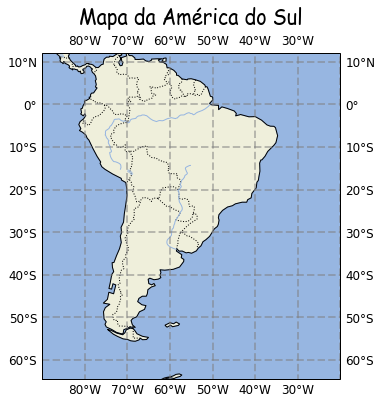

In [2]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS, linestyle=':')
ax.add_feature(cfeat.LAKES, alpha=0.5)
ax.add_feature(cfeat.RIVERS)
#ax.add_feature(state_borders, edgecolor='black')


ax.set_extent([-90, -20, 10, -60])

# Adicionando legenda e grid dos eixos
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = True
gl.ylabels_left = True
gl.xlines = True
gl.xlabel_style = {'size': 12, 'color': 'black', 'weight': 'normal'}
gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'normal'}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Mapa da América do Sul', fontsize=20, y=1.07,fontname='Comic Sans MS')

### Testando outra projeção

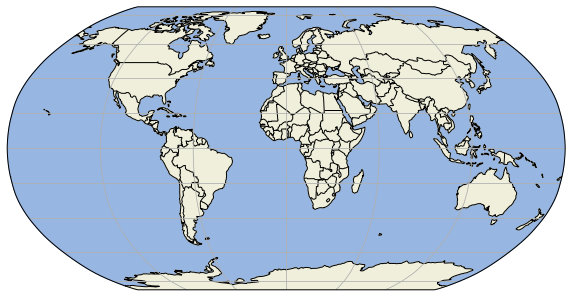

In [3]:
proj = ccrs.Robinson()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
#ax.add_feature(state_borders, edgecolor='black')
ax.add_feature(cfeat.BORDERS)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAND)

ax.gridlines()
#ax.set_extent([-50, -48, -17, -19])

### Adicionando lagos, reservatórios e rios com escala de 10m

Text(0.5, 1.04, 'Reservatório de Itumbiara')

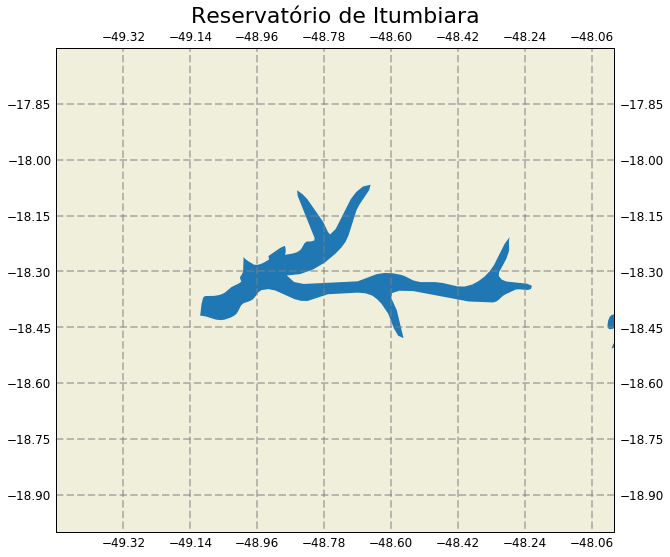

In [4]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
#ax.add_feature(state_borders, edgecolor='black')
ax.add_feature(cfeat.BORDERS)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAND)

#baixando shaperfile dos lagos com NaturalEarthFeature
lakes = cfeat.NaturalEarthFeature(category='physical', name='lakes', scale='10m')
ax.add_feature(lakes)

#Adicionando linhas de grade
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = True
gl.ylabels_left = True
gl.xlines = True
gl.xlabel_style = {'size': 12, 'color': 'black', 'weight': 'normal'}
gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'normal'}

# Dando zoom no reservatório de Itumbiara
ax.set_extent([-49.5, -48, -17.7, -19])

plt.title('Reservatório de Itumbiara', fontsize=22, y=1.04)

Podemos ver que o reservatório baixado não possui uma feição muito detalhada, sendo bom apenas para visualização em escalas menores.

Por isso usarei um arquivo .shp para o reservatório

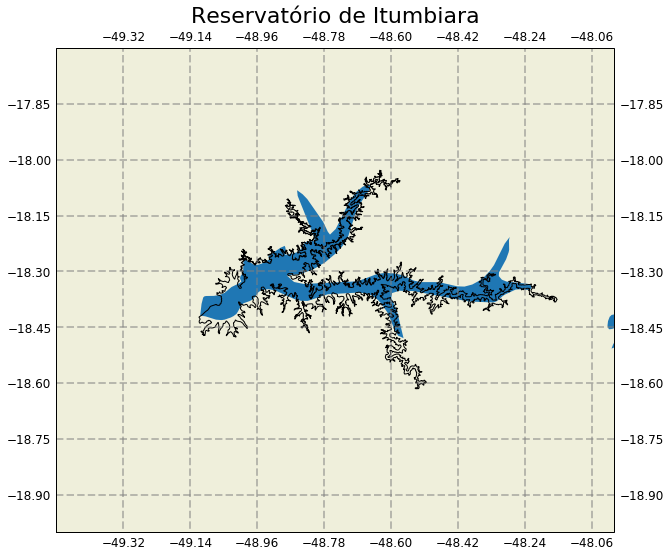

In [5]:
import cartopy.io.shapereader as shpreader

#Adicionando Shaperfile do Reservatório de Itumbiara:
itumbiara_shape = list(shpreader.Reader('Itumbiara/Itumbiara.shp').geometries())

ax.add_geometries(itumbiara_shape, ccrs.PlateCarree(), edgecolor='black',
                  facecolor='none')

fig

# Plotando Dados de um arquivo netCDF4 junto com Cartopy

In [6]:
import xarray as xr

era5 = xr.open_dataset('sea_temperature.nc').isel(time=0)
era5

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2018-04-04T10:00:00
Data variables:
    sst        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-04-01 20:21:26 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [7]:
import numpy as np

x, y = np.meshgrid(era5['longitude'], era5['latitude']) #Criando um grid x, y a partir das latitudes e lomgitudes

sst = era5.sst # extraindo a componente zonal do vento

C:\Users\robbp\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'level'
  s)


Text(0.5, 1.03, 'Temperatura da Superfície do mar - 2018-04-04 10Z')

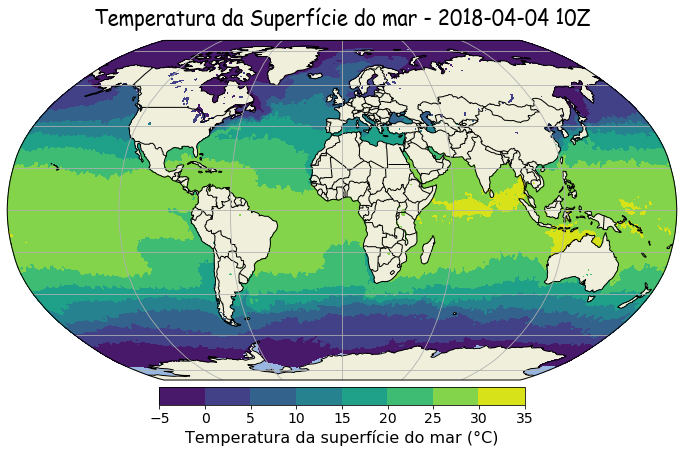

In [8]:
plt.rcParams.update({'font.size': 16}) 

plt.figure(figsize=(12, 12))                     #Criando a caixa de figura
ax = plt.axes(projection=ccrs.Robinson())      #definindo a projeção
#ax.add_feature(state_borders, edgecolor='black')
ax.add_feature(cfeat.BORDERS)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAND)
#extent = [-90, -20, 10, -60] 
#ax.set_extent(extent) # Definindo a extensão do mapa

#Criando o mapa de elevação, com cores a cada intervalo de 50 metros
im = ax.contourf(x, y, sst-273.15, cmap = "viridis", transform=ccrs.PlateCarree(), level=np.arange(-5,35,1))
cbar = plt.colorbar(im, ax=ax, extend="both", shrink=0.9, aspect=20, 
                    fraction=0.028, pad=0.01, anchor=1,
                    orientation='horizontal', label='Temperatura da superfície do mar (°C)')

cbar.ax.tick_params(labelsize=14) 

ax.gridlines()

plt.title('Temperatura da Superfície do mar - 2018-04-04 10Z', fontsize=20, y=1.03,fontname='Comic Sans MS')

Text(0.5, 1.03, 'Temperatura da Superfície do mar - 2018-04-04 10Z')

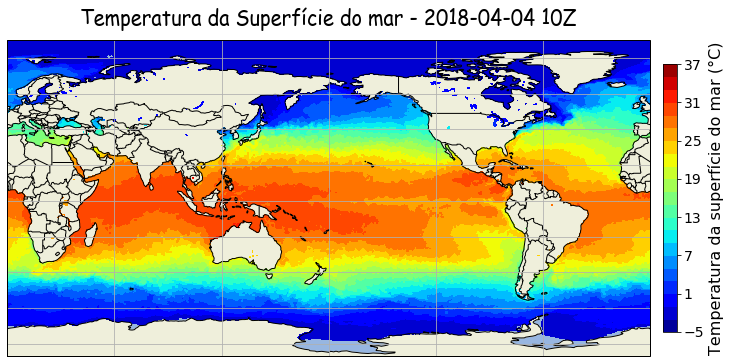

In [9]:
plt.figure(figsize=(12, 12))                     #Criando a caixa de figura
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))       #definindo a projeção
#ax.add_feature(state_borders, edgecolor='black')
ax.add_feature(cfeat.BORDERS)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAND)
#extent = [-90, -20, 10, -60] 
#ax.set_extent(extent) # Definindo a extensão do mapa

#Criando o mapa de elevação, com cores a cada intervalo de 50 metros
im = ax.contourf(x, y, sst-273.15, cmap = "jet", transform=ccrs.PlateCarree(), levels = list(range(-5, 38, 2)))
cbar = plt.colorbar(im, ax=ax, extend="both", shrink=0.9, aspect=20, 
                    fraction=0.02, pad=0.02, anchor=1,
                    orientation='vertical', label='Temperatura da superfície do mar (°C)')

cbar.ax.tick_params(labelsize=14) 

ax.gridlines()

plt.title('Temperatura da Superfície do mar - 2018-04-04 10Z', fontsize=20, y=1.03,fontname='Comic Sans MS')

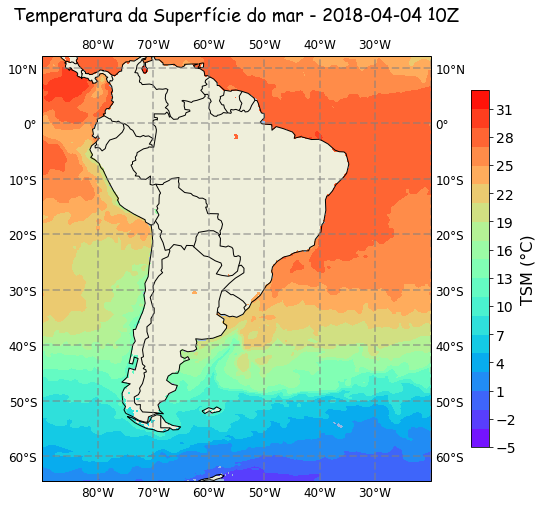

In [10]:
plt.figure(figsize=(8, 8))                                              #Criando a caixa de figura
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))       #definindo a projeção
#ax.add_feature(state_borders, edgecolor='black')
ax.add_feature(cfeat.BORDERS)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAND)

extent = [-90, -20, 10, -60] 
ax.set_extent(extent) # Definindo a extensão do mapa

#Criando o mapa de elevação, com cores a cada intervalo de 50 metros
im = ax.contourf(x, y, sst-273.15, cmap = "rainbow", transform=ccrs.PlateCarree(), levels = list(range(-5, 35, 2)))
cbar = plt.colorbar(im, ax=ax, extend="both", shrink=0.9, aspect=20, 
                    fraction=0.04, pad=0.09, anchor=1,
                    orientation='vertical', label='TSM (°C)',
                    ticks=(np.arange(-5,35,3)))

cbar.ax.tick_params(labelsize=14) 

# Adicionando legenda e grid dos eixos
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = True
gl.ylabels_left = True
gl.xlines = True
gl.xlabel_style = {'size': 12, 'color': 'black', 'weight': 'normal'}
gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'normal'}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('Temperatura da Superfície do mar - 2018-04-04 10Z', fontsize=18, y=1.07,fontname='Comic Sans MS')

plt.savefig('SST.png', dpi=300)

### Bonito! 

## Podemos criar uma função para não precisar ficar definindo os parâmetros do mapa toda hora

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def brazil_states(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=projection))
    ax.set_extent([-82, -32, -45, 10])
    ax.stock_img()
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

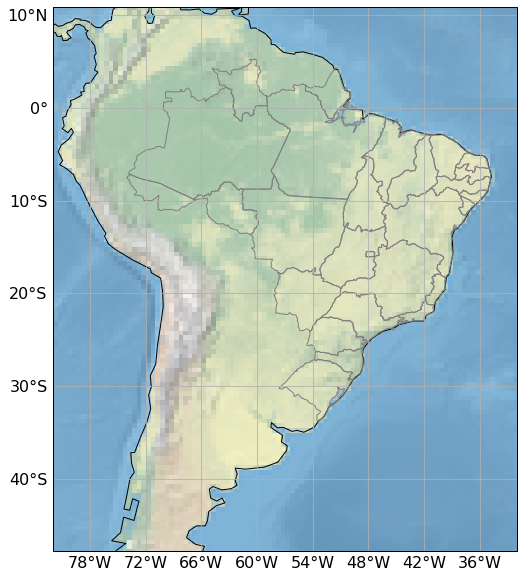

In [12]:
fig, ax = brazil_states()
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
_ = ax.add_feature(states, edgecolor='gray')

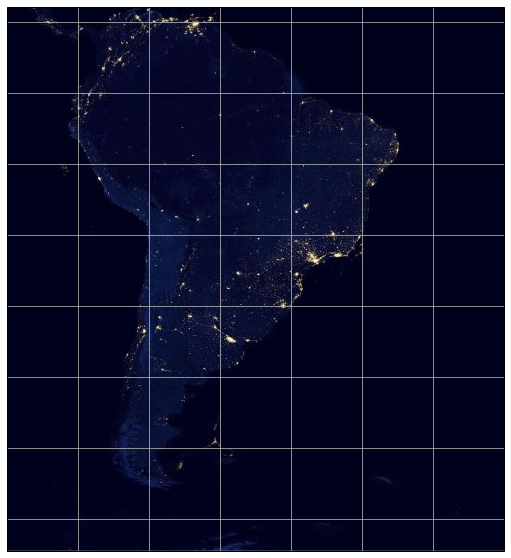

In [30]:
# https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/

url = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'VIIRS_CityLights_2012'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_extent([-90, -20, -60, 10])
ax.gridlines()
ax.add_wmts(url, layer)